In [57]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from dotenv import load_dotenv
from pandas.plotting import parallel_coordinates
import importlib

import os
import glob
import pandas as pd
import json

import utils.db_tools as db_tools
from utils.db_tools import (
    get_db,
    filter_df,
    make_animation,
    get_data,
    metrics_grid,
    plot_grid,
)

from utils.classify import classify_trajectories

importlib.reload(db_tools)

<module 'utils.db_tools' from '/cluster/home/vogtva/pde-solvers-cuda/analysis/utils/db_tools.py'>

In [59]:
model = "bruss"
run_id = "ball_sampling2"
load_dotenv()
data_dir = os.getenv("DATA_DIR")
output_dir = os.getenv("OUT_DIR")
# df = pd.read_csv(f"{output_dir}/{model}/{run_id}/classification_metrics.csv")
# df_class = classify_trajectories(
#     df, steady_threshold=1, osc_threshold=1.28, dev_threshold=1.28
# )
# df_class.value_counts("category")
# df = df_class.copy()
df = get_db(os.path.join(data_dir, model, run_id))
# df = df[df["filename"].apply(os.path.exists)].reset_index(drop=True)
# df["op"] = df["original_point"].astype(str)

In [65]:
for _, row in df.iterrows():
    if not os.path.exists(row["filename"]):
        print(row["filename"])

/cluster/scratch/vogtva/data/bruss/ball_sampling2/b46b84b2-ac98-4591-9b71-88b2cc22bfed_output.nc
/cluster/scratch/vogtva/data/bruss/ball_sampling2/a7d41d91-2d1c-4841-9560-c4df6e2ecff7_output.nc
/cluster/scratch/vogtva/data/bruss/ball_sampling2/565046b0-a493-4f7b-88d2-da676da33c93_output.nc
/cluster/scratch/vogtva/data/bruss/ball_sampling2/78022e68-e46a-4d6d-b952-f908afb330d4_output.nc
/cluster/scratch/vogtva/data/bruss/ball_sampling2/65ffe0f3-62bd-493e-a167-7cb25402b692_output.nc
/cluster/scratch/vogtva/data/bruss/ball_sampling2/d53d451c-327b-4a01-b2f2-3678e4bc59d3_output.nc
/cluster/scratch/vogtva/data/bruss/ball_sampling2/c8393bf0-d397-46af-829b-470f590b8cfa_output.nc
/cluster/scratch/vogtva/data/bruss/ball_sampling2/5fd8c6af-4de1-4111-b7cd-bdda5d628a0d_output.nc
/cluster/scratch/vogtva/data/bruss/ball_sampling2/e67bafa3-8736-43ea-b08a-f7f9fbb71383_output.nc
/cluster/scratch/vogtva/data/bruss/ball_sampling2/e154adfc-44f3-4e74-8fab-6cd16828ad2c_output.nc
/cluster/scratch/vogtva/data/b

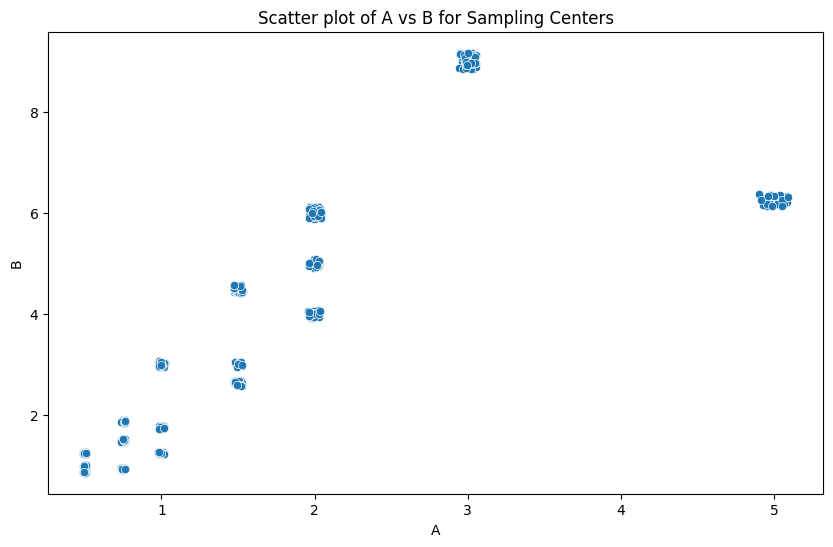

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['A'], y=df['B'])
plt.xlabel('A')
plt.ylabel('B')
plt.title('Scatter plot of A vs B for Sampling Centers')
plt.show()

In [46]:
for _, df1 in df.groupby("op"):
    final_frames = []
    for _, row in df1.iterrows():
        d = get_data(row)
        final_frame = d[0,-1,:,0::2]
        final_frames.append(final_frame)
    print(np.mean(final_frames, axis=0))
    print(np.std(final_frames, axis=0))

    break

[[0.50142866 0.5014288  0.50142866 ... 0.50142854 0.50142866 0.5014288 ]
 [0.5014286  0.50142854 0.50142854 ... 0.5014284  0.5014286  0.50142854]
 [0.5014284  0.50142837 0.50142825 ... 0.50142825 0.5014284  0.50142837]
 ...
 [0.5014288  0.5014288  0.5014288  ... 0.50142866 0.5014288  0.5014288 ]
 [0.50142866 0.5014288  0.50142866 ... 0.50142854 0.50142866 0.5014288 ]
 [0.5014286  0.50142854 0.50142854 ... 0.5014284  0.5014286  0.5014286 ]]
[[0.00556091 0.00556098 0.00556097 ... 0.00556077 0.00556091 0.00556098]
 [0.00556091 0.00556096 0.00556093 ... 0.0055608  0.00556091 0.00556096]
 [0.00556087 0.00556089 0.00556083 ... 0.00556078 0.00556087 0.00556089]
 ...
 [0.00556085 0.00556095 0.00556096 ... 0.0055607  0.00556085 0.00556095]
 [0.00556091 0.00556098 0.00556097 ... 0.00556077 0.00556091 0.00556098]
 [0.00556091 0.00556096 0.00556093 ... 0.0055608  0.00556091 0.00556091]]
